In [2]:
import pandas as pd
data=pd.read_csv('data_loadpre.txt')


In [3]:
data[:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.apply(lambda  x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Self_Employed'].fillna('No',inplace=True)
data.apply(lambda  x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
import numpy as np
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']
data['TotalIncome_log']=np.log(data['TotalIncome'])


In [8]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [9]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

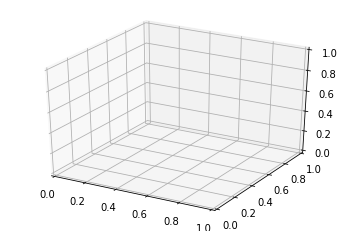

In [10]:
ax=plt.axes(projection='3d')

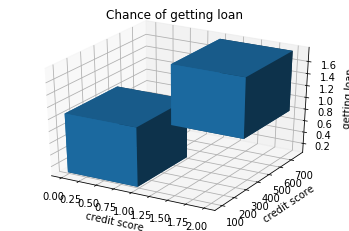

In [82]:
import matplotlib
fig = plt.figure()
ax=plt.axes(projection='3d')
dx = np.ones(61)
dy = np.ones(4)
dz = [1,2,3,4,5,6,7,8,9,10]
# temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
X=[0,1]     #credit score
Y=[90,360]  # no of people don't having credit score and having credit score
Z=[0.078,0.795] # probability of getting loan
ax.bar3d(X,Y,Z, 1, 400, 1 )  # 1,400,1 are len,wid,height

ax.set_title('Chance of getting loan')
ax.set_xlabel('credit score')
ax.set_ylabel('credit score')
ax.set_zlabel('getting loan');

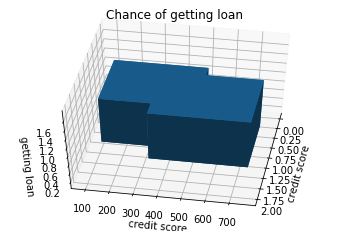

In [84]:
ax.view_init(50, 10)
fig